# Тема дипломной работы: "Поиск выбросов при анализе частных производных функции потерь логистической регрессии"





## Описание задачи и идея, лежащая в основе решения:

Дипломная работа представляет собой исследование с целью оценки данных о заболеваниях сердца на их правдоподобность по совокупности всех признаков.

Необходимость такой оценки связана с тем, что значения по признакам могут быть адекватны сами по себе, но в определенных сочетаниях не могут представлять собой реальные данные о пациенте

Так, например, пусть у нас имеется два признака "возраст" и "рост". Значения возраста 3 года и рост 180см сами по себе являются абсолютно нормальными, но для конкретного человека мы не можем себе представить трехлетнего ребенка с ростом 180см.

В медицинских данных могут содержаться ошибки такого рода. В каких-то случаях врач, благодаря своему опыту, может их выявить и исправить. Но в ситуации, когда имеется много признаков, имеющих между собой разные степени корреляции, даже опытный специалист может не увидеть совокупности аномальных значений признаков.

Поэтому, было бы полезно иметь модель, которая позволяла бы делать такую оценку.

Для решения задачи бинарной классификации используется модель логистической регрессии, в которой оптимальное решение достигается с помощью минимизации функции потерь посредством градиентного спуска, во время которого происходит обновление весовых коэффициентов, задающих линейную гиперплоскость в пространстве признаков данных. После оптимизации все наблюдения оказываются по ту или иную ее сторону.

После оптимизации вектор градиент функции потерь, рассчитанный по всей выборке, будет близок к 0 для каждого признака.
Вспомним, что он рассчитывается как сумма "индивидуальных" градиентов - частных производных функции потерь. Для каждого признака и соответствующего веса он рассчитывается отдельно. В отличии от итогового значения близкого к нулю, "индивидуальные" составляющие будут как положительными, так и отрицательными, а их суммы будут примерно равны по модулю.

Обьекты находящиеся поблизости от разделяющей гиперплоскости будут иметь градиенты близкие к нулю, они будут готовы изменить свой знак, если гиперплоскость незначительно сдвинется при следующем обновлении весов. В противоположность им, обьекты с большими градиентами будут находиться на большом расстоянии от разделяющей гиперплоскости.

Зная предсказания модели и реальные метки классов для всех обьектов мы можем выделить только верно классифицированные наблюдения. Их в целом, уже 80-90% от общего количества. Предположим, абсолютное большинство значений производных для этих обьектов имеет положительное значение. Это означает, что для уменьшения функции потерь, как для обьектов 0, так и 1 класса более оптимально, уменьшать весовой коэффициент по направлению антиградиента, что привело бы к смещению гиперплоскости вниз. Это происходит из-за важной особенности сигмоиды в функции потерь, которая заключается в том, что ее минимум достигается, когда разделяющая гиперплоскость в целом равноудалена от верно классифицированных обьектов разных классов. Поэтому, нас не должно удивлять, что движение гиперплоскости в направлении антиградиента "выгодно" для обьектов обоих классов.

Таким образом, с одной стороны мы имеем, большое количество верно классифицированных обьектов, с положительными значениями производных. В противоположность им, есть сравнительно мало обьектов с отрицательными производными и их значения большие, так как в сумме у нас должен быть примерно 0. Среди этих неверно классифицированных обьектов могут находиться потенциальные выбросы, ведь даже после оптимизации они находятся по другую сторону от разделяющей гиперплоскости и далеко от нее.

Для каждого признака можно выделить такие обьекты. Среди них для дальнейшей фильтрации выберем обьекты с максимальной нормой вектора частных производных, то есть оценим их "выбросность" по всем признакам в совокупности. Норма этого вектора является мерой расстояния до разделяющей гиперплоскости в целом в пространстве признаков.

Кроме меры расстояния мы также можем воспользоватся оценкой вероятности отнесения обьекта к тому или иному классу. Дополнительно отфильтровываем обьекты с такой вероятностью, превышающую пороговую. Например, установленную в 10%. То есть, предположим, обьект имеет реальную метку класса 0, но был классифицирован неверно, а вероятность отнесения его к первому классу моделью была оценена в 90% (модель сильно на нем ошибается)

Таким образом, можно определить обьекты - выбросы, как удовлетворяющие 3 условиям.
После оптимизации
1. они неверно классифицированы и имеют знак градиента функции потерь противоположный знаку соответствующей производной для абсолютного большинства верно классифицированных обьектов
2. норма вектора частных производных имеет большие значения
3. оценка вероятности принадлежности к неверному классу имеет значение выше пороговой

Что произойдет после удаления из выборки таких обьектов - выбросов? При данных весовых коэффициентах будут убраны большие отрицательные значения частных производных, будет необходимо провести обновление весов, во время которого обьект - выброс уже не будет "оттягивать на себя" гиперплоскость, она сдвинется и более точно разделит корректно определенные обьекты нулевого и первого класса.



## Техническая реализация решения - модель  обьекто-ориентированного программирования

При решении задачи мы работаем с данными, имеющими разную структуру.

Есть первый тип данных, который относится к наблюдениям - строкам матрицы X. Для заданного вектора весовых коэффициентов по каждому наблюдению, мы находим произведение весовых коэффициентов на значения признаков, с помощью функции сигмоида производим оценку вероятности принадлежности к классу и, соответственно, метку класса. Также для каждой строки определяется вектор частных производных фунции потерь, норма этого вектора и метка - индикатор, верно ли классифицирован обьект. Эти данные дополняют исходные значения признаков и могут храниться в одной таблице, для хранения этих данных мы просто добавляем соответствующие столбцы к матрице X

Второй тип данных - это параметры и метрики, как в виде векторов, так и имеющих числовые значения.
Это вектор весовых коэффициентов, значение функции потерь, точность классификации, learning rate,..

Для согласования данных разных типов определены два класса, через свойства и методы которых происходит хранение и обновление данных, имеющих разную структуру.

Первый класс: AdvancedFeatureData - в нем содержаться данные,относящиеся к состоянию модели для данных весовых коэффициентах

Второй класс: IterationData наследует все свойства родительского класса AdvancedFeatureData и на их основе применяет методы, необходимые для проведения итерации градиентного спуска, такие как расчет новых весовых коэффициентов, методы нахождения выбросов и их удаления из исходной матрицы X. Здесь также задаются параметры фильтрации выбросов по норме и пороговой вероятности

# Загрузка необходимых библиотек и данных

In [1]:
import numpy as np
import pandas as pd

import math
import matplotlib.pyplot as plt

import random
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
import seaborn as sns

In [3]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
!wget 'https://drive.google.com/uc?id=1cYkwDSYxDSBR3RyRzosKRUmQQKw7bHCs' -O heart.csv


--2025-01-18 12:29:22--  https://drive.google.com/uc?id=1cYkwDSYxDSBR3RyRzosKRUmQQKw7bHCs
Resolving drive.google.com (drive.google.com)... 142.250.145.138, 142.250.145.139, 142.250.145.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.145.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1cYkwDSYxDSBR3RyRzosKRUmQQKw7bHCs [following]
--2025-01-18 12:29:23--  https://drive.usercontent.google.com/download?id=1cYkwDSYxDSBR3RyRzosKRUmQQKw7bHCs
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.119.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35921 (35K) [application/octet-stream]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  35.08K  --.-KB/s    in 0s      

2025-01-18 12:29:26 (76.2 MB/s) -

# Визуальный анализ и подготовка данных к обучению

In [7]:
df = pd.read_csv('heart.csv')

In [8]:
# Числовые признаки
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
# Границы выбросов (верхняя и нижняя) по признакам
# l1 = Q1 - 1.5* IQR
# l2 = Q3 + 1.5* IQR

columns = ['Metric','Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

M1 = np.array(['IQR ', 60 - 47, 140 - 120, 267 - 173.25, 156 - 120, 1.5 - 0])
M2 = np.array(['Q1 - 1.5* IQR', 47 - 1.5* 13, 120- 1.5* 20, round(173.25- 1.5* 93.75, 1), 120- 1.5* 36, 0 - 1.5* 1.5])
M3 = np.array(['Q3 + 1.5* IQR', 60 + 1.5* 13, 140 + 1.5* 20, round(267 + 1.5* 93.75, 1), 156 + 1.5* 36, 1.5 + 1.5* 1.5])

T = np.vstack([M1, M2, M3])

outlets_limits = pd.DataFrame(data = T, columns= columns)
outlets_limits

,Metric,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,IQR,13,20,93.75,36,1.5
1,Q1 - 1.5* IQR,27.5,90.0,32.6,66.0,-2.25
2,Q3 + 1.5* IQR,79.5,170.0,407.6,210.0,3.75


In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Кодировка бинарных категориальных признаков

In [11]:
# Бинарные категориальные признаки

oe_1 = OrdinalEncoder( categories = [ ['M', 'F'] ] )

df['Sex'] = oe_1.fit_transform(df[['Sex']])


In [12]:
oe_4 = OrdinalEncoder( categories = [ ['N', 'Y'] ] )

df['ExerciseAngina'] = oe_4.fit_transform(df[['ExerciseAngina']])

In [13]:
# Для разведочного анализа используем предварительный get_dummies
# сохраняются названия, удобная визуализация

df_get_dummies = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])

df_get_dummies.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0.0,140,289,0,172,0.0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,1.0,160,180,0,156,0.0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,0.0,130,283,0,98,0.0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,1.0,138,214,0,108,1.0,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,0.0,150,195,0,122,0.0,0.0,0,False,False,True,False,False,True,False,False,False,True


###Диаграммы оценки выбросов "ящик с усами" по числовым признакам

<Axes: title={'center': 'Оценка признаков на выбросы'}>

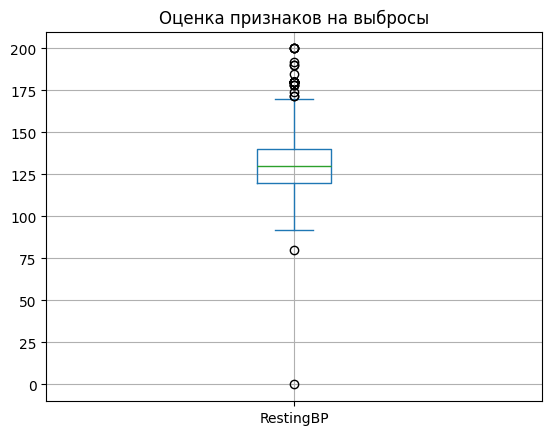

In [14]:
# Визуализация выбросов для числовых признаков 'RestingBP',	'Cholesterol',	'FastingBS',	'MaxHR', 'Age'
# Остальные признаки в one-hot кодировке
df[['RestingBP']].plot(kind='box', title='Оценка признаков на выбросы', grid=True)

<Axes: title={'center': 'Оценка признаков на выбросы'}>

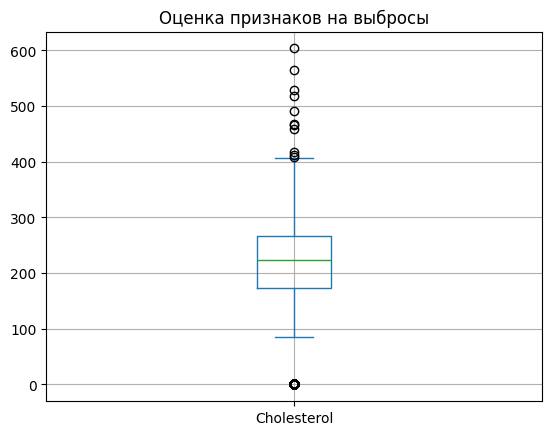

In [15]:
df[['Cholesterol']].plot(kind='box',title='Оценка признаков на выбросы', grid=True)

<Axes: title={'center': 'Оценка признаков на выбросы'}>

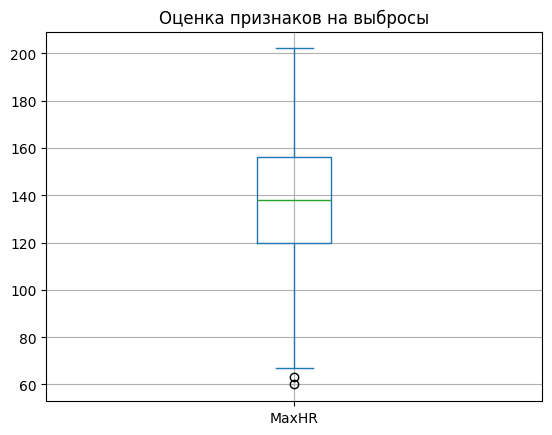

In [16]:
df[['MaxHR']].plot(kind='box', title='Оценка признаков на выбросы', grid=True)

<Axes: title={'center': 'Оценка признаков на выбросы'}>

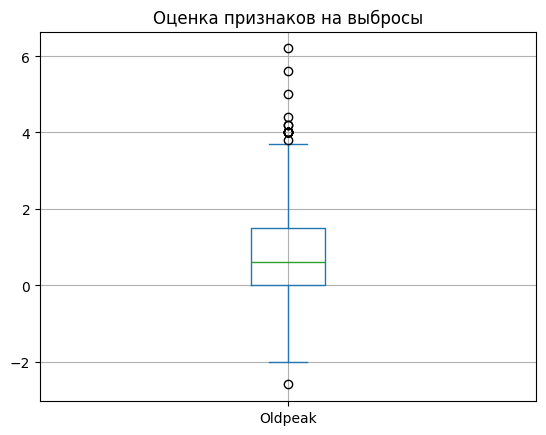

In [17]:
df[['Oldpeak']].plot(kind='box',title='Оценка признаков на выбросы', grid=True)

<Axes: title={'center': 'Оценка признаков на выбросы'}>

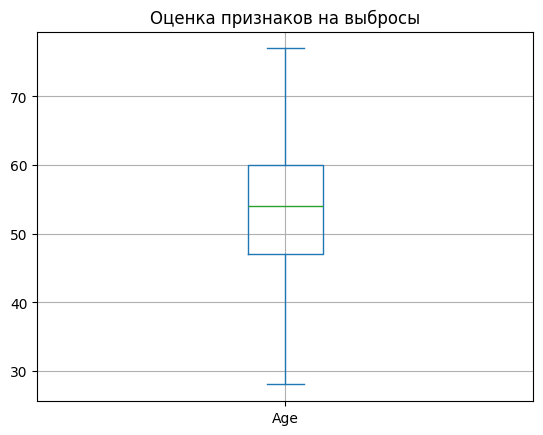

In [18]:
df['Age'].plot(kind='box', title='Оценка признаков на выбросы', grid=True)

Вывод по выбросам: Статистически выбросы есть, по несколько значений, расположенные близко друг от друга, предположительно данные о пациентах корректные

### Корреляционная матрица и тепловая карта

In [19]:
# Корреляционная матрица признаков и таргета

corr_matrix = df_get_dummies[['Age', 'Sex', 'RestingBP', 'Cholesterol', \
                  'FastingBS','MaxHR' ,'ExerciseAngina', 'Oldpeak', \
                  'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', \
                  'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',\
                  'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease']].corr()



<Axes: >

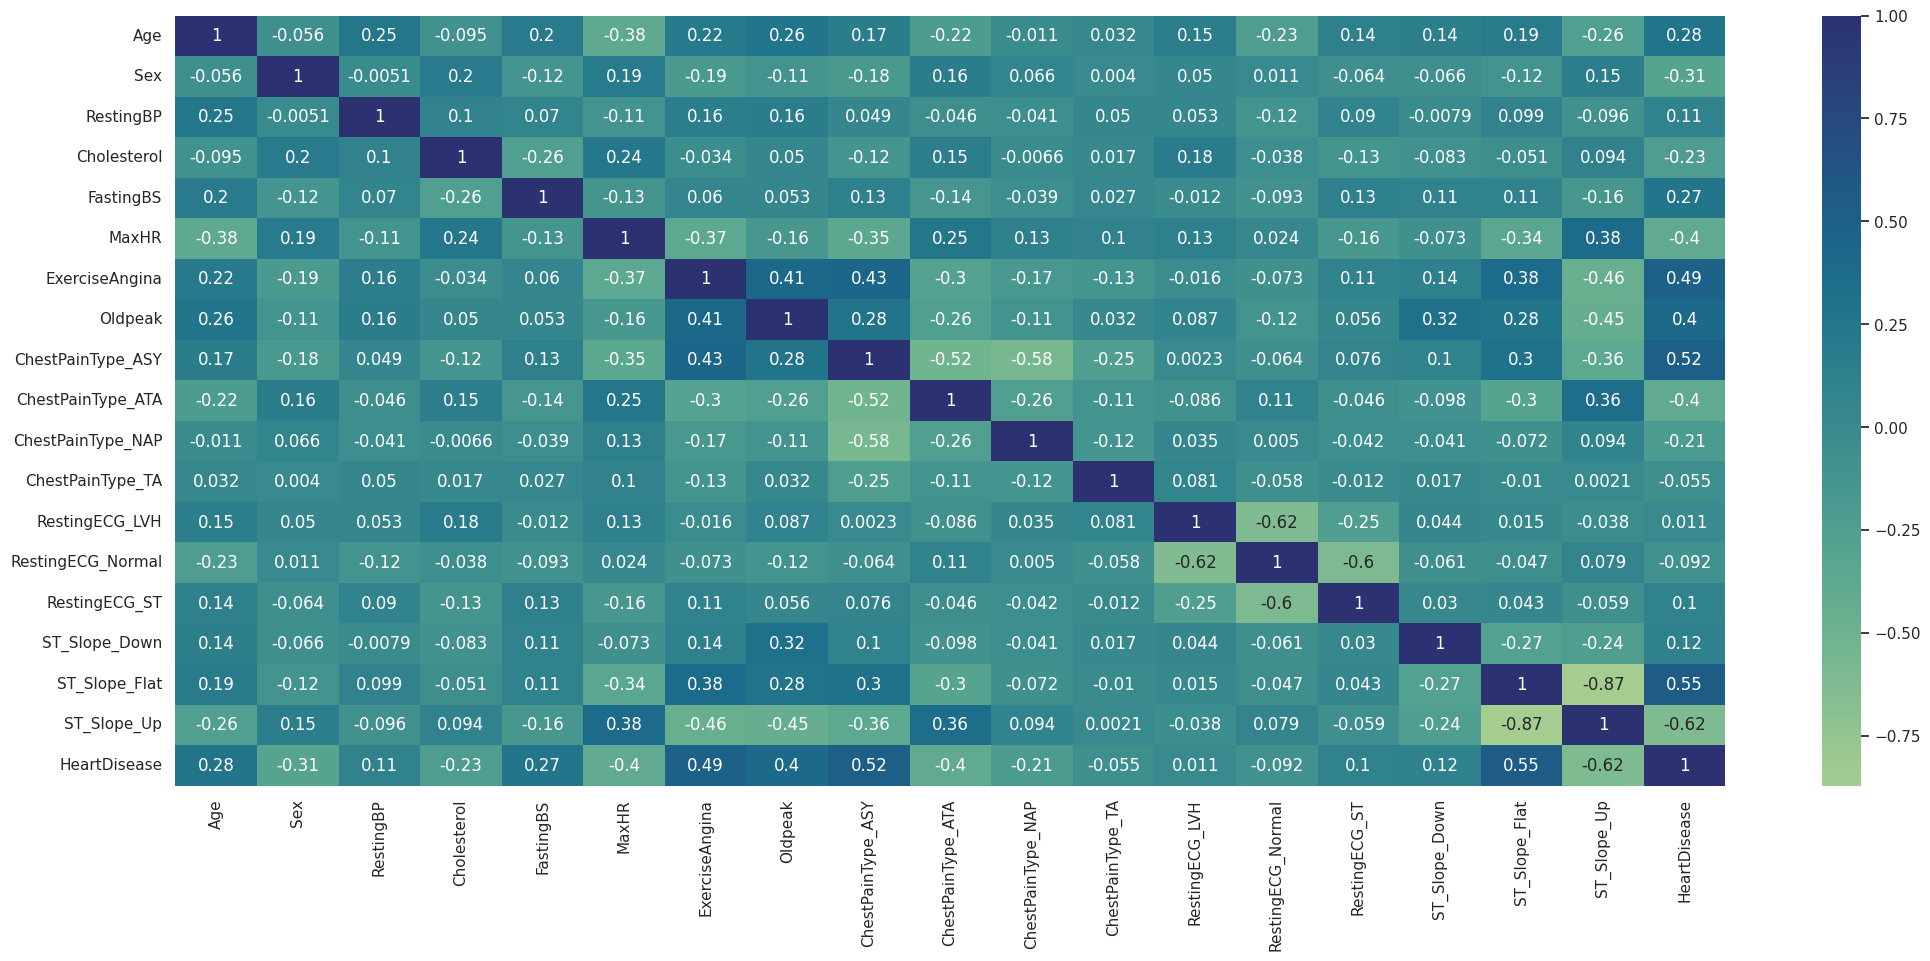

In [20]:
# Визуализация при помощи тепловой карты

sns.set(rc={'figure.figsize':(25, 10)})
sns.heatmap(corr_matrix, annot=True, cmap='crest')

Вывод по взаимной скоррелированности  признаков и таргета:
1. Целевая переменная наиболее скоррелирована с признаками
* ExerciseAngina (corr = +0.49)
* ChestPainType_ASY (corr = +0.52)
* Oldpeak   (corr = +0.4)
* ST_Slope_Flat (corr = +0.55)
* ST_Slope_Up (corr = -0.62)

2. В целом разные по природе признаки между собой не скоррелированы. Образованные в результате one_hot кодировки из одного признака признаки имеют сильную корреляцию
* ST_Slope_Up и ST_Slope_Flat (corr = - 0.87)
* RestingECG_LVH и RestingECG_Normal (corr = - 0.62)
* RestingECG_Normal и 'RestingECG_ST' (corr = - 0.6)

### Кодировка категориальных данных через OneHotEncoder

In [21]:
ohe_2 = OneHotEncoder(sparse_output=False)
X_2_data = ohe_2.fit_transform(df[['ChestPainType']])

X_2_data.shape

(918, 4)

In [22]:
ohe_3 = OneHotEncoder(sparse_output=False)
X_3_data = ohe_3.fit_transform(df[['RestingECG']])

X_3_data.shape

(918, 3)

In [23]:
ohe_5 = OneHotEncoder(sparse_output=False)
X_5_data = ohe_5.fit_transform(df[['ST_Slope']])

X_5_data.shape

(918, 3)

### Форматирование матрицы признаков X в формат numpy

In [24]:
X_cat_data = np.c_[X_2_data, X_3_data, X_5_data]

X_cat_data.shape

(918, 10)

In [25]:
Y_df = df[['HeartDisease']]

In [26]:
# Удаляем исходные признаки, которые переведены в one_hot формат
df.drop(['ChestPainType','RestingECG', 'ST_Slope'], axis= 1 , inplace= True )

In [27]:
# Удаляем целевую переменную (оставляем только числовые признаки X)
df.drop(['HeartDisease'], axis= 1 , inplace= True )


In [28]:
# df_get_dummies используем для сохранения заголовков признаков,
# столбцы аналогичны df, удаляем целевую переменную (оставляем только числовые признаки X)
df_get_dummies.drop(['HeartDisease'], axis= 1 , inplace= True )


In [29]:
df_get_dummies.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0.0,140,289,0,172,0.0,0.0,False,True,False,False,False,True,False,False,False,True
1,49,1.0,160,180,0,156,0.0,1.0,False,False,True,False,False,True,False,False,True,False
2,37,0.0,130,283,0,98,0.0,0.0,False,True,False,False,False,False,True,False,False,True
3,48,1.0,138,214,0,108,1.0,1.5,True,False,False,False,False,True,False,False,True,False
4,54,0.0,150,195,0,122,0.0,0.0,False,False,True,False,False,True,False,False,False,True


In [30]:
# Исходный дата-фрейм признаков в формате get_dummies

df_get_dummies

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0.0,140,289,0,172,0.0,0.0,False,True,False,False,False,True,False,False,False,True
1,49,1.0,160,180,0,156,0.0,1.0,False,False,True,False,False,True,False,False,True,False
2,37,0.0,130,283,0,98,0.0,0.0,False,True,False,False,False,False,True,False,False,True
3,48,1.0,138,214,0,108,1.0,1.5,True,False,False,False,False,True,False,False,True,False
4,54,0.0,150,195,0,122,0.0,0.0,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0.0,110,264,0,132,0.0,1.2,False,False,False,True,False,True,False,False,True,False
914,68,0.0,144,193,1,141,0.0,3.4,True,False,False,False,False,True,False,False,True,False
915,57,0.0,130,131,0,115,1.0,1.2,True,False,False,False,False,True,False,False,True,False
916,57,1.0,130,236,0,174,0.0,0.0,False,True,False,False,True,False,False,False,True,False


In [31]:
X_num_data = df.to_numpy()


In [32]:
X_data = np.c_[X_num_data, X_cat_data]
X_df = pd.DataFrame(data = X_data)


In [33]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,40.0,0.0,140.0,289.0,0.0,172.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49.0,1.0,160.0,180.0,0.0,156.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,0.0,130.0,283.0,0.0,98.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48.0,1.0,138.0,214.0,0.0,108.0,1.0,1.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,54.0,0.0,150.0,195.0,0.0,122.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
X_data.shape

(918, 18)

### Кодировка таргета Y через LabelEncoder

In [35]:
Y_data = Y_df.to_numpy()
Y_data.shape

(918, 1)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
le.fit( Y_df['HeartDisease'] )

LabelEncoder()

In [38]:
Y_ = pd.DataFrame(data = le.transform( Y_df['HeartDisease']))
Y_data_2D = Y_.to_numpy()
Y_data = Y_data_2D.ravel()
Y_data.shape

(918,)

### Нормирование значений признаков

In [39]:
# Функция производит нормирование признака с заданным индексом в дата-фрейме

def normalize_feature(X_df, feature_index):

    X_feature = X_df.iloc[:, feature_index]

    # Среднее и стандартное отклонение
    X_feature_mean = X_feature.mean()
    X_feature_std = X_feature.std()

    #print(X_feature_mean, X_feature_std)

    X_feature_new = (X_feature - X_feature_mean)/X_feature_std

    X_df.iloc[:, feature_index] = X_feature_new

    return X_df

In [40]:
# Нормализовать все признаки

def normalize_all_features(X_df):

  length = X_df.shape[1]

  for el in range(length):

      X1 = normalize_feature(X_df, el)
      X2 = X1.copy()
      X_df = X2

  return X_df

In [41]:
# Нормировка данных

X = normalize_all_features(X_df)
Y = Y_df


# Первоисточник наблюдений
rawX = df_get_dummies.copy()

### Итоги по предварительной подготовке данных к обучению

С данными проведены следующие преобразования:
1. Бинарные признаки 'Sex', 'ExersizeAngina' закодированы значениями 0, 1
2. Категориальные признаки ChestPainType, RestingECG, ST_Slope закодированы в one-hot формате - 10 шт
3. Числовые признаки, имеющие диапазоны значений - 5шт: RestingBP, Cholesterol, MaxHR, Oldpeak, Age
4. Бинарные числовые признаки - 3шт: Sex, FastingBS, 'ExersizeAngina'
5. Всего 19 признаков
* - 8 получено из числовых
* - 10 получено из категориальных
* - 1 вспомогательный признак - "байес" логистической регрессии, коэффициент свободного члена в сумме WX

6. Все признаки нормированы (mean = 0, std = 1)
7. Таргетная переменная Y закодирована через LabelEncoder


# Модель поиска выбросов на всей выборке (без train / test)

## Класс AdvancedFeatureData

In [42]:
def sigma(z):

  """
  Функция сигмоида для оценки вероятности принадлежности к классу 1
  в качестве аргумента ей передается произведение весовых коэффициентов на
  значения признаков по наблюдению *(-1)

  """

  res = 1/(1+(math.e)**(-z))
  return res


In [43]:
class AdvancedFeatureData():


    def __init__(self, X, Y, my_random_seed, rawX):

        """ X - признаки (numpy), Y - целевые значения (numpy)"""

        self.rand_seed = my_random_seed

        # добавляем единичный столбец перед матрицей X - для оценки байеса
        e = np.ones((len(X),1))
        X_ = np.c_[e,X]

        # features with bayes and target
        self.X = X_
        self.Y = Y
        self.XY = np.c_[X_,Y]

        # в виде дата-фрейма
        df_main = pd.DataFrame(data = self.XY)

        # Корневой дата-фрейм исходных данных с байесом (не меняется)
        self.XY_df = df_main
        self.XY_data = np.c_[X,Y]   # можно получить из X, Y без байеса

        # Первоисточник

        self.rawX = rawX

        # Рабочий текущий дата-фрейм в начальном положении
        self.df = df_main

        # последний столбец Y - находим его индекс
        b = self.df
        self.Yindex = len(b.columns)-1

        # Количество признаков (весов) и обьектов X
        self.lenW = len(b.columns)-1    # столбцы
        self.lenX = len(X)              # строки


        # # Отнести к итерациям

        # Функция потерь полного градиентного спуска, начальные значения
        self.best_loss = 100.
        self.logloss = 100.    # лучше self.current_loss

        # Лучшая точность
        self.best_accuracy = 0.
        self.best_W = []

        # # old
        # self.ejection_list = []

        # выбросы в разрезе признаков
        self.ejection_history = []

        # список выбросов по всем признакам
        self.ejection_unique = []

    # Задаем начальное значение весов при каждом признаке
    def init_W0(self, W_param):

          b = self.df
          rand_seed = self.rand_seed

          np.random.seed(rand_seed)

          # Задание W0:
          # Вариант 1 : из нормального распределения (0,1) * k_W0 (мультипликатор)

          # W0 = np.random.normal(size = (len(b.columns)-1,))

          # Вариант 2 : конкретные значения W_param

          W0 = W_param

          # Свойство .W - текущие весовые коэффициенты (array)
          self.W = W0

          # Норма вектора W
          normaW = np.linalg.norm(W0)
          self.normaW = normaW

          # Инициализация свойства - предыдущие весовые коэффициенты
          self.Wold = W0

    def drop_outlets(self, outlet_numbers):

          # в виде дата-фрейма
          df_main = pd.DataFrame(data = self.XY)

          d = df_main.copy()
          d.drop(labels = outlet_numbers,axis = 0)

          # Рабочий текущий дата-фрейм в начальном положении
          self.df = d
          df_main = d


    def proba_estimation_3col(self):

          """ Обогащение массива данных (три дополнительных столбца)
          1. скалярное произведение вектора весов W на Xi
          2. вероятность принадлежности обьекта-строки Xi к первому классу (y[i] =1) через сигмоиду( Xi @ W)
          3. прогноз таргета на основе этой вероятности (50% - порог)

          для данного вектора весов W"""

          # 1-1. Функция скалярного произведения весов на Xi

          b = self.df
          W = self.W

          def WXi(row):

              WXi = sum([(W[i]*row[i]) for i in range(len(b.columns)-1)])
              return WXi

          # 1-2. Построчное применение (WXi)

          WXi_df = b.apply(WXi, axis=1) # кортеж оценок - столбец
          wx = WXi_df.to_numpy()

          # 1-3. Обновление базовых свойств обьекта X,Y

          XY = self.XY

          # self.data_ - XY c дополнительными столбцами (array)
          self.data_ = np.c_[XY, wx]
          self.df = pd.DataFrame(data = self.data_)

          # 1-4. индекс последнего столбца wx
          b= self.df
          self.WXindex = len(b.columns)-1

          # 2-1. Функция расчета вероятности через сигмоиду

          b = self.df

          def sigma_WXi(row):

               sigma_WXi = sigma(row[len(b.columns)-1])
               return sigma_WXi

          # 2-2. Построчное применение (sigma_WXi)

          proba_i_df = b.apply(sigma_WXi, axis =1)
          proba_i = proba_i_df.to_numpy()

          # 2-3. Обновление базовых свойств обьекта

          data_ = self.data_
          self.data_ = np.c_[data_, proba_i]
          self.df = pd.DataFrame(data = self.data_)

          # 2-4. Индекс последнего столбца sigma(wx)
          b = self.df
          self.proba_index = len(b.columns)-1

          # 3-1. Функция прогноза класса целевой переменной

          b = self.df

          def my_target_i(row):

              proba_i = row[len(b.columns)-1]

              if proba_i > 0.5:
                  return float(1)
              else:
                  return float(0)

          # 3-2. Построчное применение (my_y)

          my_y_df = b.apply(my_target_i, axis =1)
          my_y = my_y_df.to_numpy()

          #3-3. Обновление базовых свойств обьекта

          data_ = self.data_
          self.data_ = np.c_[data_, my_y]
          self.df = pd.DataFrame(data = self.data_)

          #3-4. Индекс последнего столбца (my_class_index)
          b = self.df
          self.my_class_index = len(b.columns)-1


    def metrics(self):

        b = self.df
        Yindex = self.Yindex
        myclass_index = self.my_class_index
        proba_index = self.proba_index
        norma_der_index = self.NormaDerIndex
        check_class_index = self.CheckClassIndex
        tmpW = self.W

        # ошибки классификации
        b_ = b.iloc[:, Yindex: myclass_index+1]
        df_wrong = (b_[ b_[Yindex] != b_[myclass_index]])

        wrong_index = df_wrong.index
        self.wrong_index = wrong_index

        self.df_wrong = df_wrong
        self.len_wrong = len(df_wrong)

        # Accuracy
        tmp_accuracy = 1 - len(df_wrong)/len(b)
        self.accuracy = tmp_accuracy

        logloss_tmp = self.logloss

        if logloss_tmp <= self.best_loss:
          self.best_loss = logloss_tmp
          self.best_accuracy = tmp_accuracy
          self.best_W = tmpW

        # Correct/wrong classified
        self.correct_classified_df = b[b[check_class_index] == 1]
        self.wrong_classified_df = b[b[check_class_index] == 0]


    # Определение выбросов по одному выбранному признаку (feature_index)
    def ejection_for_feature_func(self, feature_index, norma_grad_thr = 4.0, confident_thresh = 0.1):

        cc_df = self.correct_classified_df
        wc_df = self.wrong_classified_df

        c_plus_df = cc_df[cc_df[feature_index]>0]
        c_minus_df = cc_df[cc_df[feature_index]<0]

        w_plus_df = wc_df[wc_df[feature_index]>0]
        w_minus_df = wc_df[wc_df[feature_index]<0]

        len_c_plus = len(c_plus_df)
        len_c_minus = len(c_minus_df)

        len_w_plus = len(w_plus_df)
        len_w_minus = len(w_minus_df)

        col_eject = ['Target', 'W_dot_X', 'proba_class = 1', 'Prediction', 'norma_Xi_gradient', 'correct/wrong_pred']

        eject_col_index_list = [self.Yindex, self.WXindex, self.proba_index, self.my_class_index, \
                                self.NormaDerIndex, self.CheckClassIndex]


        if len_c_plus < len_c_minus:
            ejections_1 = w_plus_df[eject_col_index_list]
        else:
            ejections_1 = w_minus_df[eject_col_index_list]

        ejections_1.columns = col_eject

        ejections_2 = ejections_1[(ejections_1['norma_Xi_gradient'] > norma_grad_thr)]
        f = ejections_2.copy()

        # Дополнительная фильтрация по оценке вероятности принадлежности к классу.
        # Уверенность модели в этой оценке говорит о том, что имеется большое количество похожих обьектов
        # с другим (правильным) таргетом.

        ejections_3 = f[((f['Target'] == 1) & (f['proba_class = 1'] < confident_thresh))|\
                ((f['Target'] == 0) & (f['proba_class = 1'] > 1 - confident_thresh))]

        ejection_indexes = ejections_3.index
        ejection_list = ejection_indexes.to_list()

        self.ejection_for_feature_tmp = ejection_list


    # Определение единого списка выбросов по всем признакам
    def ejection_classification(self):

      lenW = self.lenW
      ejection_history = []

      # список выбросов по каждому признаку в общую историю
      for fea_index in range(lenW):

          self.ejection_for_feature_func(fea_index)
          ejection_list = self.ejection_for_feature_tmp
          ejection_history.append([fea_index, ejection_list])

      # Выбросы в разрезе признаков (feature - ejection_list)
      self.ejection_history = ejection_history

      # ejection_united = ejection_history[1][1]+ ejection_history[2][1]+\
      #             ejection_history[3][1] + ejection_history[4][1]+ ejection_history[5][1]+\
      #             ejection_history[6][1] + ejection_history[7][1]+ ejection_history[8][1]+\
      #             ejection_history[9][1] + ejection_history[10][1]+ ejection_history[11][1]+\
      #             ejection_history[12][1]+ ejection_history[13][1]+ ejection_history[14][1]+\
      #             ejection_history[15][1]+ ejection_history[16][1]+ ejection_history[17][1]+\
      #             ejection_history[18][1]

      ejection_united = []
      for fea_index in range(lenW):
          ejection_united.extend(ejection_history[fea_index][1])  #! про

      ejection_unique = list(dict.fromkeys(ejection_united))
      ejection_unique = sorted(ejection_unique)

      self.ejection_unique = ejection_unique

      ejection_list = self.ejection_unique


      # b = self.df
      # Для вывода наблюдений используем дата-фрейм источник
      b = df_get_dummies.copy()

      eject_df = b.copy()

      eject_df.reset_index(inplace=True)

      def ejection_marked(row):

            if row['index'] in ejection_list:
                  ejection_bin = 1
            else:
                  ejection_bin = 0

            return ejection_bin

      eject_df['ejection_bin'] = eject_df.apply(ejection_marked, axis=1) # кортеж оценок - столбец

      # рабочий дата-фрейм с дополнительным столбцом (ejection_bin)
      self.eject_df = eject_df


    # Функция потерь по всей выборке
    def cost_function(self):
      """ Возвращает число - функцию потерь для данных весов
      """

      old_loss = self.logloss
      self.old_loss = old_loss

      d = self.df

      Yind = self.Yindex
      proba = self.proba_index

      new_loss = (-1)* (np.sum(np.log(d[d[Yind] == 1][proba])) + \
             np.sum(np.log(1-d[d[Yind] == 0][proba])))/d.shape[0]

      self.logloss = new_loss

      if new_loss < self.best_loss:
        self.best_loss = new_loss

    # Частная производная по j - весовому коэффициенту
    def derivative_cost_func(self,j):
        """ Формирует вектор размерности len(Y),
        состоящий из части суммы, зависящей от Xi в общей частной производной
        функции потерь по j-весу
        """

        b = self.df
        Yindex = self.Yindex
        WXindex = self.WXindex
        proba_index = self.proba_index
        jj = j

        # 4-1. Частная производная функции потерь  по коэффициенту весов Wj (при Xj)
        def der_cost_function_ij(row):

              # Производная суммы равна сумме производных из двух частей под знаком суммы

              # Если y[i] = 1, то первый множитель суммы (производная от ln(sigma(W*Xi))
              i_part_1 = 1/row[proba_index]

              # Если y[i] = 0, то первый множитель суммы (производная от ln(1-sigma(W*Xi))
              i_part_2 = (-1)/(1-row[proba_index])

              # Дифференцирование сложной функции, умножаем первую изменяемую часть на
              # частную производную сигмоидной функции sigma(W*Xi) по Wj (получена при дифференцировании аналитически)

              der_sigma_ij = (math.e)**(-row[WXindex]) * row[jj] / (((1 + (math.e)**(- row[WXindex])))**2)


              if row[Yindex] == 1:
                    i_part = i_part_1 * der_sigma_ij
              else:
                    i_part = i_part_2 * der_sigma_ij

              return i_part

        # 4-2. Построчное применение функции (вычисление частной производной для j признака, слагаемое в i - строке)

        der_j_df = b.apply(der_cost_function_ij, axis = 1)
        der_j = der_j_df.to_numpy()

        # 4-3. Обновление базовых свойств объекта

        data_ = self.data_
        self.data_ = np.c_[data_, der_j]
        self.df = pd.DataFrame(data = self.data_)


    # Цикл для вычисления всех столбцов - частных производных
    def derivatives(self):

        for j in range(self.lenW):
            self.derivative_cost_func(j)

    # Длина вектора частных производных для Xi
    def norma_derivatives(self):

          """ Обогащение массива данных
          норма вектора производных (начиная со столбца my_y до конца, длиной lenW)
          """

          # 1-1. Функция скалярного произведения весов на Xi

          b = self.df


          W = self.W
          lenW = self.lenW

          first_der_index = self.Yindex +4            # 4 - c учетом 3 столбцов proba_estimation
          last_der_index  = self.Yindex +4 + (lenW-1)

          b_ = b.iloc[:, first_der_index:last_der_index]

          def norma_derivative_i(row):

              derivatives_i = [row[i] for i in range(first_der_index,last_der_index)]
              norma_derivatives = np.linalg.norm(derivatives_i)

              return norma_derivatives

          # 1-2. Построчное применение (WXi)

          norma_der_df = b_.apply(norma_derivative_i, axis=1) # кортеж оценок - столбец
          norma_der = norma_der_df.to_numpy()

          # 1-3. Обновление базовых свойств обьекта X,Y

          data_ = self.data_

          # self.data_ - XY c дополнительными столбцами (array)
          self.data_ = np.c_[data_, norma_der]
          self.df = pd.DataFrame(data = self.data_)

          # 1-4. индекс последнего столбца norma_der
          b= self.df
          self.NormaDerIndex = len(b.columns)-1

    # Метка ошибки классификации
    def wrong_classification_label(self):

          """ Если обьект классифицирован верно - 1, неверно 0
          """

          # 1-1. Функция скалярного произведения весов на Xi

          b = self.df
          W = self.W
          lenW = self.lenW

          Yindex = self.Yindex
          my_class_index = self.my_class_index

          def check_classification_i(row):

              if row[Yindex] == row[my_class_index]:
                return True
              else:
                return False

          # 1-2. Построчное применение (WXi)

          check_class_df = b.apply(check_classification_i, axis=1) # кортеж оценок - столбец
          check_class = check_class_df.to_numpy()

          # 1-3. Обновление базовых свойств обьекта X,Y

          data_ = self.data_

          # self.data_ - XY c дополнительными столбцами (array)
          self.data_ = np.c_[data_, check_class]
          self.df = pd.DataFrame(data = self.data_)

          # 1-4. индекс последнего столбца norma_der
          b= self.df
          self.CheckClassIndex = len(b.columns)-1

    # Вектор градиент - сумма по столбцу (для всех Xi) по каждой частной производной
    def grad_logloss(self):
        """ Сумма по столбцам частных производных
        определяет вектор градиент
        """

        b = self.df
        num_W = self.lenW
        lenX = self.lenX

        # Индекс столбца перед столбцом с производными + 1
        _ = self.my_class_index + 1

        der_cost_func_list = []

        for w_index in range(num_W):

          der_j = sum(b[_+ w_index]) / lenX    #* (-1)

          der_cost_func_list.append(der_j)


        self.gradient = der_cost_func_list

        norma_grad = np.linalg.norm(der_cost_func_list)
        self.norma_grad = norma_grad

    #Стохастический вектор градиент - градиент для случайного Xi (из неверно классифицированных)
    def grad_logloss_stoch(self, random_number):

        """ Извлекает градиент для элемента random_number
        """


        b = self.df
        num_W = self.lenW
        lenX = self.lenX

        # Индекс столбца перед столбцом с производными + 1
        _ = self.my_class_index + 1


        der_cost_func_list = []

        for w_index in range(num_W):

          der_j = b.iloc[random_number,_+ w_index] #*(-1)

          der_cost_func_list.append(der_j)

        self.gradient = der_cost_func_list

        norma_grad = np.linalg.norm(der_cost_func_list)
        self.norma_grad = norma_grad

    def publish_advanced_feature_data(self):

        print("Весовые коэффициенты", self.W)
        print('Норма W:', round(self.normaW, 4))

        print('Точность классификации', round(self.accuracy,4))

        print('Функция потерь', round(self.logloss,4))

        # print("Ошибки классификации:" )
        # print(self.df_wrong)

        print('Неверно классифицированные индексы')
        print(self.wrong_index)

        print('Значение функции потерь')
        print(round(self.logloss,4))

        # print('Дата-фрейм производных сформирован')
        current_df = self.df
        my_y = self.my_class_index

        derivatives_df = current_df.iloc[:, my_y: ]
        self.derivatives_df = derivatives_df

        print('Норма градиента функции потерь', round(self.norma_grad,3))


## Класс IterationData

In [44]:
class IterationData(AdvancedFeatureData):

    def __init__(self, X, Y, my_random_seed, rawX):
        super().__init__(X, Y, my_random_seed, rawX)



        self.iterations = 0
        self.ejection_list = []

    def drop_ejections(self, ejection_numbers):

        # в виде дата-фрейма
        df_main = pd.DataFrame(data = self.XY)

        d = df_main.copy()
        d.drop(d.index[ejection_numbers], inplace=True)

        # Изменение базового дата-фрейма
        df_main = d

        # Изменение XY данных
        d_numpy = d.to_numpy()
        self.XY = d_numpy
        self.lenW = len(d.columns) - 1
        self.lenX = len(d)

        # Рабочий текущий дата-фрейм в начальном положении
        self.df = d

    def weights_real(self, learning_rate):

        # предыдущие весы
        W0 = self.Wold

        # рабочие весы считываем из self.W
        Wnest = self.W

        lenW = self.lenW

        # для следующей итерации текущие весы будут прошлыми
        self.Wold = Wnest

        # градиент обновления весов (общий или стохастический)
        grad_nesterov = self.gradient



        for j in range(lenW):

            if stoch_flag == True:
                Wnest[j] = Wnest[j] + 0.2 * grad_nesterov[j]
            else:
                Wnest[j] = Wnest[j] + learning_rate* grad_nesterov[j]

        # для следующей итерации записываем полученные весы
        self.W = Wnest

        # Норма вектора W
        normaW = np.linalg.norm(Wnest)
        self.normaW = normaW

    def init_iteration(self):

        self.init_W0(W_start)    # W_start задаются как внешняя переменная
        self.proba_estimation_3col()

        self.cost_function()
        self.derivatives()
        self.norma_derivatives()
        self.wrong_classification_label()

        self.metrics()

        self.grad_logloss()
        gradient = self.gradient

        # self.weights_perspective()
        # self.weights_real()

        # i = self.iteration
        # self.iteration = i+1

    def gradient_iteration(self, stoch_flag, stoch_element_index, learning_rate):

        self.weights_real(learning_rate)

        # Рабочий текущий дата-фрейм в начальном положении
        df_main = pd.DataFrame(data = self.XY)
        self.df = df_main

        self.proba_estimation_3col()
        self.cost_function()
        self.derivatives()
        self.norma_derivatives()
        self.wrong_classification_label()

        self.metrics()

        if stoch_flag == False:
              self.grad_logloss()

        else:
              self.grad_logloss_stoch(stoch_element_index)


        gradient = self.gradient

        i = self.iterations
        self.iterations = i+1

    def way_down_based_on_gradient(self, epochs, iter_print_step, learning_rate, \
                                   norma_grad_for_stoch_activation, decrease_coef_for_thresh):

        self.learning_rate = learning_rate
        self.epochs = epochs
        self.iter_print_step = iter_print_step

        # первая итерация по полному градиенту
        stoch_flag = False

        # коэффициент порога длины стохастического градиента, который уменьшается
        # после каждого вызова стохастического градиента


        for _ in range(epochs):

              if self.norma_grad < norma_grad_for_stoch_activation:

                  stoch_flag = True
                  stoch_element_index = random.randint(0, len(self.wrong_index)-1)
                  norma_grad_for_stoch_activation*= decrease_coef_for_thresh

              else:
                  stoch_flag = False
                  stoch_element_index = 0

              self.gradient_iteration(stoch_flag, stoch_element_index, learning_rate)

              if _ % iter_print_step == 0:
                  print('Итерация: ', self.iterations, \
                      'Точность: ', round(self.accuracy,4),
                      'Функция потерь:', round(self.logloss,4),
                      "Норма W:", round(self.normaW,4),
                      "Норма градиента", round(self.norma_grad, 3))

              if self.norma_grad < 0.0001:
                  print('Затухание градиента')
                  break

    def predict(self, X, Y):

        # метод возвращает модель, постороенную на тестовых данных
        random_state = 42

        prediction_model = AdvancedFeatureData(X, Y, random_state)

        stoch_flag = True
        stoch_element_index = 0

        W_start = self.best_W

        prediction_model.init_W0(W_start)

        prediction_model.proba_estimation_3col()

        prediction_model.cost_function()

        prediction_model.derivatives()

        prediction_model.norma_derivatives()
        prediction_model.wrong_classification_label()

        prediction_model.metrics()

        # Определение вектора градиента (стохастический или полный)
        if stoch_flag == False:

              prediction_model.grad_logloss()
        else:
              prediction_model.grad_logloss_stoch(stoch_element_index)



        self.prediction_model = prediction_model


    def publish_results(self):

        # print('Момент Нестерова:', Lnesterov)
        print('Learning_rate:', self.learning_rate)
        print('Итерации:', self.iterations)
        print('Норма W:', round(self.normaW,3))
        print('Best_loss', round(self.best_loss,3))
        print('Best_accuracy', round(self.best_accuracy,3))
        print("Лучшие весовые коэффициенты", self.best_W)
        #print("Ошибки классификации:" )
        #print(self.df_wrong)

In [45]:
# Параметры
# Фиксируем зерно генератора случайного числа
my_random_seed = 42

# Параметры выбора типа градиента для обновления весов
# stoch_flag = True - используется стохастический градиент (на случайном наблюдении)
# stoch_flag = False - используется полный градиент функции потерь (по всей выборке)

stoch_flag = True
stoch_element_index = 0

## Инициализация модели поиска выбросов  -

In [46]:
# Модель поиска выбросов

ejection_model = IterationData(X,Y,my_random_seed, rawX)

# генерируем начальные веса из нормального распределения (0,1)
W_start = np.random.normal(size = (len(ejection_model.df.columns)-1,))

# первая итерация для инициализации всех свойств
ejection_model.init_iteration()

## Градиентный спуск перед удалением выбросов

In [47]:
# Параметры:
# 1. learning_rate - скорость обучения
# Для борьбы с затуханием градиента используются 2 параметра
# 2. norma_grad_for_stoch_activation - норма градиента, при который используется стохастический градиент вместо полного
# 3. decrease_coef_for_thresh - при каждом вызове стохастического градиента, norma_gr_thresh уменьшается
# умножением на этот коэффициент, таким образом при приближении к точке оптимума стохастический градиент
# вызывается все реже и реже

ejection_model.way_down_based_on_gradient(epochs = 501, iter_print_step=100, \
                                      learning_rate=0.03, norma_grad_for_stoch_activation =0.08, decrease_coef_for_thresh = 0.9)

Итерация:  1 Точность:  0.4924 Функция потерь: 1.8155 Норма W: 3.6798 Норма градиента 0.939
Итерация:  101 Точность:  0.8595 Функция потерь: 0.3506 Норма W: 2.224 Норма градиента 0.056
Итерация:  201 Точность:  0.8584 Функция потерь: 0.3312 Норма W: 1.9863 Норма градиента 0.04
Итерация:  301 Точность:  0.8649 Функция потерь: 0.3254 Норма W: 1.9561 Норма градиента 0.017
Итерация:  401 Точность:  0.866 Функция потерь: 0.324 Норма W: 1.9073 Норма градиента 0.008
Итерация:  501 Точность:  0.8649 Функция потерь: 0.3242 Норма W: 1.8755 Норма градиента 0.009


In [48]:
# Метрики модели после оптимизации градиентным спуском
ejection_model.publish_results()

Learning_rate: 0.03
Итерации: 501
Норма W: 1.875
Best_loss 0.324
Best_accuracy 0.867
Лучшие весовые коэффициенты [ 0.30947267  0.19870972 -0.59045667  0.10517093 -0.47113683  0.48356389
 -0.07481842  0.44664781  0.31177385  0.23229734 -0.5584186  -0.51276236
 -0.22512264 -0.00999978 -0.10060369 -0.16115127 -0.30573434  0.03727916
 -1.20580942]


In [49]:
# Проведена оптимизация, проверим, что общий градиент функции потерь близок к 0 по всем частным производным
ejection_model.gradient

[0.002969390566577174,
 -0.0023671859744739433,
 -0.0010247494845349707,
 -0.002100010847548713,
 0.0014056093728580965,
 -0.0011791383813678975,
 -0.0009746324272054645,
 0.0004242370067890641,
 0.004981630230834728,
 -0.00019709209896393883,
 0.0008726318770879956,
 -0.0004591103785252574,
 -0.00024065041308877228,
 -0.0015685232920690734,
 -0.0014856837739650362,
 0.0034410215060955806,
 -0.002505459030760776,
 0.0002381222073922791,
 0.0010388848172602654]

## Анализ выбросных наблюдений

### Способ 1. Модель ООП - ejection_model

In [50]:
# В свойствах модели сформированы дата-фреймы наблюдений

# все наблюдения
df = ejection_model.df

# все ошибки
wrong_classified_df = ejection_model.wrong_classified_df

# все верные ответы
correct_classified_df = ejection_model.correct_classified_df

# Количество ошибочных и верных классификаций
len(wrong_classified_df), len(correct_classified_df)

(124, 794)

In [51]:
# Процедура определение выбросных наблюдений
ejection_model.ejection_classification()

In [52]:
# Cчитывание результатов из модели
ejection_unique = ejection_model.ejection_unique
ejection_history = ejection_model.ejection_history
ejection_df = ejection_model.eject_df

In [53]:
# Индексы выбросных наблюдений и их количество
print('Количество выбросов, найденных моделью ejection_model: ', len(ejection_unique))
print('Индексы выбросов', ejection_unique)


Количество выбросов, найденных моделью ejection_model:  9
Индексы выбросов [314, 375, 420, 423, 515, 556, 682, 691, 759]


In [54]:
# Выбросы, найденные построенной моделью ejection_model
ejection_df[ejection_df['ejection_bin'] == 1]

,index,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ejection_bin
314,314,53,0.0,80,0,0,141,1.0,2.0,True,False,False,False,False,True,False,True,False,False,1
375,375,73,1.0,160,0,0,121,0.0,0.0,False,False,True,False,False,False,True,False,False,True,1
420,420,66,0.0,110,213,1,99,1.0,1.3,False,False,True,False,True,False,False,False,True,False,1
423,423,60,0.0,180,0,0,140,1.0,1.5,False,False,True,False,False,False,True,False,True,False,1
515,515,63,0.0,130,0,1,160,0.0,3.0,False,False,True,False,False,False,True,False,True,False,1
556,556,75,0.0,160,310,1,112,1.0,2.0,True,False,False,False,False,True,False,True,False,False,1
682,682,58,1.0,136,319,1,152,0.0,0.0,False,True,False,False,True,False,False,False,False,True,1
691,691,45,0.0,104,208,0,148,1.0,3.0,True,False,False,False,True,False,False,False,True,False,1
759,759,54,0.0,192,283,0,195,0.0,0.0,False,True,False,False,True,False,False,False,False,True,1


### Способ 2. Моделирование по квартилям распределения - "за пределами усов" ящика с усами

In [55]:
# Определяем по признакам верхнюю и нижнюю границу
# limit_min = Q1 - 1.5* IQR
# limit_max = Q3 + 1.5* IQR

columns = ['Metric','Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

M1 = np.array(['IQR ', 60 - 47, 140 - 120, 267 - 173.25, 156 - 120, 1.5 - 0])
M2 = np.array(['Q1 - 1.5* IQR', 47 - 1.5* 13, 120- 1.5* 20, 173.25- 1.5* 93.75, 120- 1.5* 36, 0 - 1.5* 1.5])
M3 = np.array(['Q3 + 1.5* IQR', 60 + 1.5* 13, 140 + 1.5* 20, 267 + 1.5* 93.75, 156 + 1.5* 36, 1.5 + 1.5* 1.5])

T = np.vstack([M1, M2, M3])

outlets_limits = pd.DataFrame(data = T, columns= columns)
outlets_limits

,Metric,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,IQR,13,20,93.75,36,1.5
1,Q1 - 1.5* IQR,27.5,90.0,32.625,66.0,-2.25
2,Q3 + 1.5* IQR,79.5,170.0,407.625,210.0,3.75


In [56]:
# Поиск наблюдений - выбросов, имеющих значения, выходящие за рамки интервала
# [Q1 - 1.5* IQR, Q2 + 1.5*IQR]

X_box_Q1Q3 = df_get_dummies.copy()

outliers_box_Q1Q3 = X_box_Q1Q3[
    (X_box_Q1Q3['RestingBP'] > float(outlets_limits.iloc[2,2])) |
    (X_box_Q1Q3['RestingBP'] < float(outlets_limits.iloc[1,2])) |
    (X_box_Q1Q3['Cholesterol'] > float(outlets_limits.iloc[2,3])) |
    (X_box_Q1Q3['Cholesterol'] < float(outlets_limits.iloc[1,3])) |
    (X_box_Q1Q3['MaxHR'] > float(outlets_limits.iloc[2,4])) |
    (X_box_Q1Q3['MaxHR'] < float(outlets_limits.iloc[1,4])) |
    (X_box_Q1Q3['Oldpeak'] > float(outlets_limits.iloc[2,5])) |
    (X_box_Q1Q3['Oldpeak'] < float(outlets_limits.iloc[1,5])) |
    (X_box_Q1Q3['Age'] > float(outlets_limits.iloc[2,1])) |
    (X_box_Q1Q3['Age'] < float(outlets_limits.iloc[1,1]))
    ]

print('Количество выбросов, найденных статистическим методом ', len(outliers_box_Q1Q3))
outliers_box_Q1Q3

Количество выбросов, найденных статистическим методом  216


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
28,53,1.0,113,468,0,127,0.0,0.0,False,True,False,False,False,True,False,False,False,True
30,53,0.0,145,518,0,130,0.0,0.0,False,False,True,False,False,True,False,False,True,False
68,52,0.0,160,246,0,82,1.0,4.0,True,False,False,False,False,False,True,False,True,False
69,44,0.0,150,412,0,170,0.0,0.0,True,False,False,False,False,True,False,False,False,True
76,32,0.0,118,529,0,130,0.0,0.0,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,62,1.0,160,164,0,145,0.0,6.2,True,False,False,False,True,False,False,True,False,False
855,68,0.0,180,274,1,150,1.0,1.6,False,False,True,False,True,False,False,False,True,False
880,52,0.0,172,199,1,162,0.0,0.5,False,False,True,False,False,True,False,False,False,True
900,58,0.0,114,318,0,140,0.0,4.4,True,False,False,False,False,False,True,True,False,False


In [57]:
# Количество наблюдений со значением 'Cholesterol' == 0
len(outliers_box_Q1Q3[outliers_box_Q1Q3['Cholesterol'] == 0])

172

Количество выбросов по признакам "за пределами усов" : 216
1. Age - 0
2. RestingBP - 28
3. Cholesterol - 183, из них 'Cholesterol' = 0 --> 172 значения
4. MaxHR	 - 2
5. Oldpeak - 16

In [58]:
# Индексы выбросов, найденных вторым способом (на основе квартилей)
outliers_box_Q1Q3_indexes = outliers_box_Q1Q3.index

outliers_box_Q1Q3_indexes

Index([ 28,  30,  68,  69,  76, 103, 109, 123, 149, 166,
       ...
       774, 775, 780, 791, 796, 850, 855, 880, 900, 908],
      dtype='int64', length=216)

#### Общие выбросы для способа 1 и 2 (ejection_model vs "за пределами усов"

In [59]:
ejection_common_1_2 = list(set(ejection_unique) & set(outliers_box_Q1Q3_indexes))
ejection_common_1_2

[515, 423, 759, 314, 375]

1. Для всех потенциальных выбросов по признакам MaxHR, OldPeak, Age значения внутри диапазона [ Q1 - 1.5 IQR , Q3 + 1.5 IQR ]
2. 4 наблюдения имеют подтверждение выброса  по признаку Cholesterol (значение 0 < Q1 - 1.5 IQR = 32.62)
3. 2 наблюдения имеют подтверждение выброса  по признаку  RestingBP (
  значение 80 < Q1 - 1.5 IQR = 90,
  значение 192 >  Q1 - 1.5 IQR = 170)
4. наблюдение 314 имеет подтверждение по двум признакам

Таким образом, 5 из 9 найденных выбросов также определяются как выбросы при исследовании распределения значений (диаграмма "ящик с усами")

### Способ 3. Выявление выбросов с помощью модел DBSCAN

In [60]:
# подгружаем необходимые библиотеки

from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

In [61]:
X_DBSCAN = X.copy()
print(len(X_DBSCAN))

X_DB = StandardScaler().fit_transform(X_DBSCAN)

918


In [62]:
# Задаем DBSCAN
# подбираем параметры eps - радиус окружности вокруг ключевой точки
# число точек в окружности, чтобы считаться ключевой

db = DBSCAN(eps=4.2, min_samples=3).fit(X_DB)

# Массив из нулей по числу обьектов
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

# Core - обьекты, ключевые точки
class_objects = db.core_sample_indices_
print(len(class_objects))

core_samples_mask[db.core_sample_indices_] = True

# Размечаем обьекты,
# значение -1 соответствует выбросам, не находятся в окрестности ключевой точки
labels = db.labels_

# !!! Есть обьекты, не являющиеся ключевой точкой, но входящие в ее окрестность

905


In [63]:
len(core_samples_mask)

918

In [64]:
# Накладываем маску на X_train
X_filtered = X[core_samples_mask]

# Фиксируем индексы ключевых точек
filtered_indexes = X_filtered.index

X_indexes = X.index

# Индексы выбросов в исходном дата-фрейме
# Из всех наблюдений вычитаем находящихся в окрестностях ключевых точек

DBSCAN_outlier_index_list = list(set(X_indexes) - set(filtered_indexes))
DBSCAN_outlier_index_list

[449, 547, 733, 904, 396, 879, 496, 850, 307, 215, 824, 541, 702]

In [71]:
DBSCAN_outlier_index_list

[215, 307, 396, 449, 496, 541, 547, 702, 733, 824, 850, 879, 904]

In [65]:
eject_from_rawX_df = df_get_dummies.copy()

eject_from_rawX_df.reset_index(inplace=True)

outlier_list = DBSCAN_outlier_index_list

def ejection_mark_in_rawX(row):

      if row['index'] in outlier_list:
            ejection_bin = 1
      else:
            ejection_bin = 0

      return ejection_bin

eject_from_rawX_df['ejection_bin'] = eject_from_rawX_df.apply(ejection_mark_in_rawX, axis=1)

DBSCAN_outliers_df = eject_from_rawX_df[eject_from_rawX_df['ejection_bin'] == 1]
DBSCAN_outliers_df

,index,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ejection_bin
215,215,30,1.0,170,237,0,170,0.0,0.0,False,False,False,True,False,False,True,False,False,True,1
307,307,53,0.0,130,0,0,120,0.0,0.7,False,True,False,False,False,False,True,True,False,False,1
396,396,62,1.0,140,0,1,143,0.0,0.0,False,False,False,True,False,True,False,False,True,False,1
449,449,55,0.0,0,0,0,155,0.0,1.5,False,False,True,False,False,True,False,False,True,False,1
496,496,58,0.0,132,458,1,69,0.0,1.0,True,False,False,False,False,True,False,True,False,False,1
541,541,76,0.0,104,113,0,120,0.0,3.5,False,False,True,False,True,False,False,True,False,False,1
547,547,61,0.0,142,200,1,100,0.0,1.5,False,False,False,True,False,False,True,True,False,False,1
702,702,59,0.0,178,270,0,145,0.0,4.2,False,False,False,True,True,False,False,True,False,False,1
733,733,66,1.0,150,226,0,114,0.0,2.6,False,False,False,True,False,True,False,True,False,False,1
824,824,37,0.0,130,250,0,187,0.0,3.5,False,False,True,False,False,True,False,True,False,False,1


#### Общие выбросы для способа 1 и 3 (ejection_model vs DBSCAN)

In [66]:
ejection_common_1_3 = list(set(ejection_unique) & set(DBSCAN_outlier_index_list))
ejection_common_1_3

[]

**Итоги сравнения:  Списки выбросов, найденные моделью DBSCAN и моделью ejection_model полностью различаются**

#### Общие выбросы для способа 2 и 3 ("за пределами усов" vs DBSCAN)

In [67]:
ejection_common_2_3 = list(set(outliers_box_Q1Q3_indexes) & set(DBSCAN_outlier_index_list))
ejection_common_2_3

[449, 396, 496, 850, 307, 702]

In [68]:
# Таблица верхних и нижних границ по признакам

Выбросы DBSCAN, имеющие выходящие "за пределы усов" значения признаков
- 449 - Cholesterol = 0 < 32
- 396 - Cholesterol = 0 < 32
- 496 - Cholesterol = 458 > 407
- 850 - Old_peak = 6.2 > 3.75
- 307 - Cholesterol = 0 < 32
- 702 - RestingBP = 178 > 170 и Old_peak = 4.2 > 3.75


**Итоги сравнения:  Списки выбросов, найденные моделью DBSCAN и статистическим методом через квартили имеют 6 общих наблюдений

## Удаление выбросов, найденных моделью ejection_model из дата-фрейма

In [72]:
# Новая модель оптимизируется на данных, из которых исключены выбросы
# Параметры сохраняются такими же как и для base model

# начальные веса считываем из модели ejection_model

W_base = ejection_model.best_W

W_start = W_base.copy()

cleared = IterationData(X,Y,my_random_seed, rawX)

cleared.ejection_unique = ejection_unique

# удаление выбросов из выборки
cleared.drop_ejections(ejection_unique)

cleared.init_iteration()

print('Состояние после инициализации перед оптимизацией')
cleared.publish_advanced_feature_data()

Состояние после инициализации перед оптимизацией
Весовые коэффициенты [ 0.30947267  0.19870972 -0.59045667  0.10517093 -0.47113683  0.48356389
 -0.07481842  0.44664781  0.31177385  0.23229734 -0.5584186  -0.51276236
 -0.22512264 -0.00999978 -0.10060369 -0.16115127 -0.30573434  0.03727916
 -1.20580942]
Норма W: 1.8755
Точность классификации 0.8735
Функция потерь 0.2986
Неверно классифицированные индексы
Index([  1,  19,  26,  30,  39,  41,  45,  54,  57,  76,
       ...
       864, 870, 874, 880, 881, 884, 885, 890, 904, 907],
      dtype='int64', length=115)
Значение функции потерь
0.2986
Норма градиента функции потерь 0.026


### Градиентный спуск 1

In [73]:
cleared.way_down_based_on_gradient(epochs = 501, iter_print_step=100, \
                                    learning_rate=0.03, norma_grad_for_stoch_activation =0.08, \
                                    decrease_coef_for_thresh = 0.9)

Итерация:  1 Точность:  0.8735 Функция потерь: 0.2985 Норма W: 1.8784 Норма градиента 0.909
Итерация:  101 Точность:  0.8592 Функция потерь: 0.3358 Норма W: 1.7649 Норма градиента 0.154
Итерация:  201 Точность:  0.8735 Функция потерь: 0.3067 Норма W: 1.9543 Норма градиента 0.062
Итерация:  301 Точность:  0.879 Функция потерь: 0.2979 Норма W: 2.0417 Норма градиента 0.02
Итерация:  401 Точность:  0.879 Функция потерь: 0.2997 Норма W: 2.0231 Норма градиента 0.027
Итерация:  501 Точность:  0.8823 Функция потерь: 0.2957 Норма W: 2.0268 Норма градиента 0.106


In [74]:
cleared.publish_results()

Learning_rate: 0.03
Итерации: 501
Норма W: 2.027
Best_loss 0.296
Best_accuracy 0.882
Лучшие весовые коэффициенты [ 3.88416253e-01  1.59107729e-01 -7.35414473e-01  1.08665131e-04
 -4.15240763e-01  5.42434172e-01 -1.45527789e-01  4.95484672e-01
  4.88249181e-01  2.62088973e-01 -6.12407247e-01 -4.89866357e-01
 -2.39954544e-01 -4.05005788e-02 -9.71159261e-02 -1.34337418e-01
 -3.13511040e-01  7.78068825e-02 -1.24276585e+00]


## Удаление выбросов, найденных моделью DBSCAN из дата-фрейма

In [75]:
# Новая модель оптимизируется на данных, из которых исключены выбросы,
# определенные моделью DBSCAN
# Параметры сохраняются такими же как и для base model

# начальные веса считываем из модели ejection_model

W_base = ejection_model.best_W

W_start = W_base.copy()

cleared_DB = IterationData(X,Y,my_random_seed, rawX)

cleared_DB.ejection_unique = DBSCAN_outlier_index_list

# удаление выбросов из выборки
cleared_DB.drop_ejections(DBSCAN_outlier_index_list)

cleared_DB.init_iteration()

print('Состояние после инициализвации перед оптимизацией')
cleared_DB.publish_advanced_feature_data()

Состояние после инициализвации перед оптимизацией
Весовые коэффициенты [ 0.30947267  0.19870972 -0.59045667  0.10517093 -0.47113683  0.48356389
 -0.07481842  0.44664781  0.31177385  0.23229734 -0.5584186  -0.51276236
 -0.22512264 -0.00999978 -0.10060369 -0.16115127 -0.30573434  0.03727916
 -1.20580942]
Норма W: 1.8755
Точность классификации 0.8663
Функция потерь 0.3211
Неверно классифицированные индексы
Index([  1,  19,  26,  30,  39,  41,  45,  54,  57,  76,
       ...
       860, 862, 871, 877, 878, 881, 882, 887, 900, 903],
      dtype='int64', length=121)
Значение функции потерь
0.3211
Норма градиента функции потерь 0.011


### Градиентный спуск 2

In [76]:
cleared_DB.way_down_based_on_gradient(epochs = 501, iter_print_step=100, \
                                    learning_rate=0.03, norma_grad_for_stoch_activation =0.08, \
                                    decrease_coef_for_thresh = 0.9)

Итерация:  1 Точность:  0.8663 Функция потерь: 0.321 Норма W: 1.8755 Норма градиента 1.832
Итерация:  101 Точность:  0.8652 Функция потерь: 0.3271 Норма W: 1.8389 Норма градиента 0.041
Итерация:  201 Точность:  0.8696 Функция потерь: 0.3216 Норма W: 1.9078 Норма градиента 0.019
Итерация:  301 Точность:  0.8729 Функция потерь: 0.3213 Норма W: 1.9246 Норма градиента 0.015
Итерация:  401 Точность:  0.8707 Функция потерь: 0.3214 Норма W: 1.9022 Норма градиента 0.02
Итерация:  501 Точность:  0.8718 Функция потерь: 0.3222 Норма W: 1.8296 Норма градиента 0.02


In [ ]:
cleared_DB.publish_results()

Learning_rate: 0.03
Итерации: 501
Норма W: 2.64
Best_loss 0.32
Best_accuracy 0.873
Лучшие весовые коэффициенты [ 0.33533406  0.11182083 -0.60099738  0.16565452 -0.44582405  0.48745684
 -0.13029996  0.39864004  0.41343053  0.92566126 -0.01481818  0.0390678
  0.0743602  -0.825691   -1.10129995 -0.9200341  -0.40456976 -0.15342769
 -1.37190979]


## Удаление выбросов "за пределами усов" из дата-фрейма

In [77]:
# Новая модель оптимизируется на данных, из которых исключены выбросы,
# определенные моделью DBSCAN
# Параметры сохраняются такими же как и для base model

# начальные веса считываем из модели ejection_model

W_base = ejection_model.best_W

W_start = W_base.copy()

cleared_Q1Q3 = IterationData(X,Y,my_random_seed, rawX)

cleared_Q1Q3.ejection_unique = outliers_box_Q1Q3_indexes

# удаление выбросов из выборки
cleared_Q1Q3.drop_ejections(outliers_box_Q1Q3_indexes)

cleared_Q1Q3.init_iteration()

print('Состояние после инициализвации перед оптимизацией')
cleared_Q1Q3.publish_advanced_feature_data()

Состояние после инициализвации перед оптимизацией
Весовые коэффициенты [ 0.30947267  0.19870972 -0.59045667  0.10517093 -0.47113683  0.48356389
 -0.07481842  0.44664781  0.31177385  0.23229734 -0.5584186  -0.51276236
 -0.22512264 -0.00999978 -0.10060369 -0.16115127 -0.30573434  0.03727916
 -1.20580942]
Норма W: 1.8755
Точность классификации 0.8561
Функция потерь 0.3388
Неверно классифицированные индексы
Index([  1,  19,  26,  37,  39,  43,  52,  55,  83,  84,
       ...
       660, 666, 669, 675, 676, 679, 680, 685, 697, 700],
      dtype='int64', length=101)
Значение функции потерь
0.3388
Норма градиента функции потерь 0.032


### Градиентный спуск 3

In [78]:
cleared_Q1Q3.way_down_based_on_gradient(epochs = 501, iter_print_step=100, \
                                    learning_rate=0.03, norma_grad_for_stoch_activation =0.08, \
                                    decrease_coef_for_thresh = 0.9)

Итерация:  1 Точность:  0.8575 Функция потерь: 0.3386 Норма W: 1.8748 Норма градиента 0.833
Итерация:  101 Точность:  0.8647 Функция потерь: 0.3303 Норма W: 1.8508 Норма градиента 0.019
Итерация:  201 Точность:  0.8732 Функция потерь: 0.3319 Норма W: 1.8124 Норма градиента 0.035
Итерация:  301 Точность:  0.8718 Функция потерь: 0.3273 Норма W: 1.8261 Норма градиента 0.015
Итерация:  401 Точность:  0.8689 Функция потерь: 0.3261 Норма W: 1.8085 Норма градиента 0.005
Итерация:  501 Точность:  0.8689 Функция потерь: 0.3262 Норма W: 1.7842 Норма градиента 0.01


In [79]:
cleared_Q1Q3.publish_results()

Learning_rate: 0.03
Итерации: 501
Норма W: 1.784
Best_loss 0.326
Best_accuracy 0.869
Лучшие весовые коэффициенты [-0.13990751  0.28281945 -0.68781118  0.16754718  0.24588916  0.16084019
 -0.00844977  0.3808523   0.46038313  0.20096724 -0.54964722 -0.47244847
 -0.2459635  -0.04071581 -0.16105027 -0.05493719 -0.25341406 -0.00394524
 -1.19089459]


### Итоги: Метрики модели после удаления различных наборов выбросов

In [80]:
# Метрики модели при удалении выбросов, найденных 3 разными способами

columns = ['Metric after deleting ejections and optimization','ejections ejection_model','ejections DBSCAN', 'ejections Q1_Q3']

M0 = np.array(['number_ejections',
              len(cleared.ejection_unique),
              len(cleared_DB.ejection_unique),
              len(cleared_Q1Q3.ejection_unique)])
M1 = np.array(['accuracy ',
               round(cleared.best_accuracy,3),
               round(cleared_DB.best_accuracy,3),
               round(cleared_Q1Q3.best_accuracy,3)]),
M2 = np.array(['loss',
               round(cleared.best_loss,3),
               round(cleared_DB.best_loss,3),
               round(cleared_Q1Q3.best_loss,3)])

T = np.vstack([M0, M1, M2])

outlets_limits = pd.DataFrame(data = T, columns= columns)
outlets_limits

,Metric after deleting ejections and optimization,ejections ejection_model,ejections DBSCAN,ejections Q1_Q3
0,number_ejections,9,13,216
1,accuracy,0.882,0.876,0.869
2,loss,0.296,0.32,0.326


## Сравнение метрик модели ejection_model до и после удаления выбросов

In [81]:
# Весовые коэффициенты
baseW = ejection_model.best_W
clearedW = cleared.best_W

In [82]:
# функция для вычисления изменения в процентах
def percent_change(row):

    per_change = (row[2]/row[1] - 1)* 100
    per_change = round(per_change, 1)
    return per_change

In [83]:
# Сравнение оптимальных весовых коэффициентов до и после удаления выбросов

weigth_compare = []

for i in range(len(baseW)):
    weigth_compare.append([round(baseW[i], 2), round(clearedW[i], 2)])

weight_names = ['base_model', 'cleared']

weigth_compare_df = pd.DataFrame(weigth_compare, columns=weight_names)
weigth_compare_df.reset_index(inplace=True)
weigth_compare_df.rename(columns={'index': 'feature_index'}, inplace=True)

weigth_compare_df['percent_change (%)'] = weigth_compare_df.apply(percent_change, axis=1)
weigth_compare_df

<ipython-input-82-ce799e885a79>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  per_change = (row[2]/row[1] - 1)* 100


,feature_index,base_model,cleared,percent_change (%)
0,0,0.31,0.39,25.8
1,1,0.20,0.16,-20.0
2,2,-0.59,-0.74,25.4
3,3,0.11,0.00,-100.0
4,4,-0.47,-0.42,-10.6
5,5,0.48,0.54,12.5
6,6,-0.07,-0.15,114.3
7,7,0.45,0.50,11.1
8,8,0.31,0.49,58.1
9,9,0.23,0.26,13.0


### Итоги по значениям весовых коэффициентов:
1. После удаления выбросов значения весовых коэффициентов значительно изменились, что означает совершенно другую оценку значимости влияния на таргет соответствующих признаков



In [84]:
point_1 = 'Длина выборки'
base_len = ejection_model.lenX
cleared_len = cleared.lenX

point_2 = 'Удалено элементов'
base_ejection = 0
cleared_ejection = len(ejection_unique)

point_3 = 'Верно классифицировано'
base_correct = len(ejection_model.correct_classified_df)
cleared_correct = len(cleared.correct_classified_df)

point_4 = 'Ошибки классификации'
base_wrong = len(ejection_model.wrong_classified_df)
cleared_wrong = len(cleared.wrong_classified_df)

point_5 = 'Logloss'
based_loss = round(ejection_model.best_loss, 3)
cleared_loss = round(cleared.best_loss, 3)

point_6 = 'Accuracy'
base_accuracy = round(ejection_model.best_accuracy, 3)
cleared_accuracy = round(cleared.best_accuracy, 3)

point_7 = 'ejection_list'
base_ejection_list = []
cleared_ejection_list = cleared.ejection_unique

models_results_dict = { point_1: [base_len, cleared_len], \
                        point_2: [base_ejection, cleared_ejection], \
                        point_3: [base_correct, cleared_correct], \
                        point_4: [base_wrong, cleared_wrong ], \
                        point_5: [based_loss, cleared_loss], \
                        point_6: [base_accuracy, cleared_accuracy], \
                        point_7: [base_ejection_list, cleared_ejection_list]
                       }

### Метрики модели до и после удаления выбросов



In [85]:
models_results_df = pd.DataFrame(models_results_dict)
models_results_df.reset_index(inplace=True)

models_results_df.rename(columns={'index': 'model'}, inplace=True)

models_results_df.astype({'model': 'string'}).dtypes

models_results_df.iloc[0,0] = 'before deleting ejections'
models_results_df.iloc[1,0] = 'after deleting ejections'

models_results_df

<ipython-input-85-ed232f3e6931>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'before deleting ejections' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  models_results_df.iloc[0,0] = 'before deleting ejections'


,model,Длина выборки,Удалено элементов,Верно классифицировано,Ошибки классификации,Logloss,Accuracy,ejection_list
0,before deleting ejections,918,0,794,124,0.324,0.867,[]
1,after deleting ejections,909,9,802,107,0.296,0.882,"[314, 375, 420, 423, 515, 556, 682, 691, 759]"


# Сравнение модели ООП ejection_model с моделью "из коробки" sklearn Logistic Regression по метрике accuracy (train / test)

In [86]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

skl_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

### Кросс - валидация по random state (5 вариантов разбиения на train / test)

#### Разделение выборки на обучающую и тестовую

In [87]:
# Разделяем на тренировочные и тестовые данные
test_size_param = 0.1

# Сохраняем разбиения на  train/test

X_train_randset = []
X_test_randset = []
y_train_randset = []
y_test_randset = []

for i in range(5):

    X_train, X_test, y_train, y_test = train_test_split(X_df,Y_df,
                                                      test_size=test_size_param,
                                                      random_state=i+25)
    X_train_randset.append(X_train)
    X_test_randset.append(X_test)
    y_train_randset.append(y_train)
    y_test_randset.append(y_test)

y_train_randset[0].shape, y_test_randset[0].shape

((826, 1), (92, 1))

In [88]:
def skl_model_metrics(random_split):

    # в формате pandas
    X_train = X_train_randset[random_split]
    X_test = X_test_randset[random_split]

    y_train = y_train_randset[random_split]
    y_test = y_test_randset[random_split]

    # в формате numpy
    X_train_data = X_train.to_numpy()
    X_test_data = X_test.to_numpy()

    y_train_data = y_train.to_numpy()
    y_test_data = y_test.to_numpy()

    y_train_data = y_train_data.ravel()
    y_test_data = y_test_data.ravel()

    skl_model.fit(X_train_data, y_train_data)
    predictions_test = skl_model.predict(X_test_data)

    # метрики

    skl_train_accuracy = round(skl_model.score(X_train_data, y_train_data),4)
    skl_test_accuracy = round(skl_model.score(X_test_data, y_test_data),4)

    return skl_train_accuracy, skl_test_accuracy

#### Модель sklern Logistic Regression для различных разбиений на train / test

In [89]:
skl_model_history = []
train_sum = 0
test_sum = 0

for i in range(5):

    skl_train_accuracy, skl_test_accuracy = skl_model_metrics(i)
    skl_model_history.append([i, [skl_train_accuracy, skl_test_accuracy]])
    train_sum += skl_train_accuracy
    test_sum += skl_test_accuracy

skl_mean_train = train_sum / 5
skl_mean_test = test_sum / 5

print('Accuracy для различных разбиений на train / test', skl_model_history)
print('skl accuracy_train cредняя ', round(skl_mean_train,3))
print('skl accuracy_test cредняя ', round(skl_mean_test,3))

Accuracy для различных разбиений на train / test [[0, [0.8705, 0.8804]], [1, [0.8705, 0.8587]], [2, [0.8668, 0.8913]], [3, [0.8668, 0.9022]], [4, [0.8705, 0.8587]]]
skl accuracy_train cредняя  0.869
skl accuracy_test cредняя  0.878


### Ejection_model для этих же разбиений на train/test

In [90]:
def ejection_model_metrics(X_train_split,Y_train_split, X_test_split,Y_test_split):

    W_start = ejection_model.best_W

    model_train_split = IterationData(X_train_split,Y_train_split, my_random_seed, rawX)

    model_train_split.init_iteration()
    model_train_split.way_down_based_on_gradient(epochs = 501, iter_print_step=100, \
                                    learning_rate=0.03, norma_grad_for_stoch_activation =0.08, \
                                    decrease_coef_for_thresh = 0.9)

    accuracy_train = model_train_split.best_accuracy
    loss_train = model_train_split.best_loss

    W_train = model_train_split.best_W

    W_start = W_train

    model_test_split = IterationData(X_test_split,Y_test_split, my_random_seed, rawX)

    model_test_split.init_iteration()

    accuracy_test = model_test_split.best_accuracy
    loss_test = model_test_split.best_loss

    return accuracy_train, loss_train, accuracy_test, loss_test


In [91]:
ejection_report = []
ejection_sum_accuracy_train = 0
ejection_sum_accuracy_test = 0

for j_train in range(5):

    X_train = X_train_randset[j_train]
    y_train = y_train_randset[j_train]

    X_train = normalize_all_features(X_train)

    X_test = X_test_randset[j_train]
    y_test = y_test_randset[j_train]

    X_test = normalize_all_features(X_test)

    print('Оптимизация ', j_train)
    accuracy_train, loss_train, accuracy_test, loss_test = ejection_model_metrics(X_train, y_train, X_test, y_test)

    ejection_sum_accuracy_train += accuracy_train
    ejection_sum_accuracy_test += accuracy_test

    ejection_report.append([j_train, [round(accuracy_train,4), round(accuracy_test,4)]])

ejection_mean_train = ejection_sum_accuracy_train / 5
ejection_mean_test = ejection_sum_accuracy_test / 5

ejection_report, ejection_mean_train, ejection_mean_test

Оптимизация  0
Итерация:  1 Точность:  0.8414 Функция потерь: 0.3741 Норма W: 1.7826 Норма градиента 0.126
Итерация:  101 Точность:  0.8692 Функция потерь: 0.3377 Норма W: 1.9377 Норма градиента 0.053
Итерация:  201 Точность:  0.8632 Функция потерь: 0.3316 Норма W: 1.916 Норма градиента 0.034
Итерация:  301 Точность:  0.8644 Функция потерь: 0.3281 Норма W: 1.9133 Норма градиента 0.018
Итерация:  401 Точность:  0.8705 Функция потерь: 0.3279 Норма W: 1.8593 Норма градиента 0.014
Итерация:  501 Точность:  0.8692 Функция потерь: 0.328 Норма W: 1.9099 Норма градиента 0.017
Оптимизация  1
Итерация:  1 Точность:  0.8717 Функция потерь: 0.323 Норма W: 1.9089 Норма градиента 0.836
Итерация:  101 Точность:  0.8692 Функция потерь: 0.3282 Норма W: 1.9732 Норма градиента 0.046
Итерация:  201 Точность:  0.8741 Функция потерь: 0.3225 Норма W: 1.9194 Норма градиента 0.02
Итерация:  301 Точность:  0.8753 Функция потерь: 0.3212 Норма W: 1.9011 Норма градиента 0.012
Итерация:  401 Точность:  0.8717 Функц

([[0, [0.8705, 0.8913]],
  [1, [0.8705, 0.837]],
  [2, [0.868, 0.8913]],
  [3, [0.8692, 0.9022]],
  [4, [0.8741, 0.8478]]],
 0.8704600484261501,
 0.8739130434782607)

In [92]:
# Итоговые метрики sklearn_Logistic_Regression и ejection_model

features = ['Random_split','sklearn_train','ejection_model_train','sklearn_test', 'ejection_model_test']

M1 = np.array(['0', round(skl_model_history[0][1][0], 3), round(ejection_report[0][1][0],3), \
                  round(skl_model_history[0][1][1], 3), round(ejection_report[0][1][1], 3)])
M2 = np.array(['1', round(skl_model_history[1][1][0], 3), round(ejection_report[1][1][0],3), \
                  round(skl_model_history[1][1][1], 3), round(ejection_report[1][1][1], 3)])
M3 = np.array(['2', round(skl_model_history[2][1][0], 3), round(ejection_report[2][1][0],3), \
                  round(skl_model_history[2][1][1], 3), round(ejection_report[2][1][1], 3)])
M4 = np.array(['3', round(skl_model_history[3][1][0], 3), round(ejection_report[3][1][0],3), \
                  round(skl_model_history[3][1][1], 3), round(ejection_report[3][1][1], 3)])
M5 = np.array(['4', round(skl_model_history[4][1][0], 3), round(ejection_report[4][1][0],3), \
                  round(skl_model_history[4][1][1], 3), round(ejection_report[4][1][1], 3)])
M6 = np.array(['mean', round(skl_mean_train, 3), round(ejection_mean_train,3), \
                  round(skl_mean_test, 3), round(ejection_mean_test, 3)])

T = np.vstack([M1,M2,M3, M4,M5,M6])

accuracy_compared = pd.DataFrame(data = T, columns= features)
accuracy_compared

,Random_split,sklearn_train,ejection_model_train,sklearn_test,ejection_model_test
0,0,0.871,0.871,0.88,0.891
1,1,0.871,0.871,0.859,0.837
2,2,0.867,0.868,0.891,0.891
3,3,0.867,0.869,0.902,0.902
4,4,0.871,0.874,0.859,0.848
5,mean,0.869,0.87,0.878,0.874


Итоги: Метрики по  accuracy у ejection_model и skl Logistic Regression на данных с выбросами
-  train sklearn mean: 86.9% vs ejection_model 87.0%
-  test sklearn mean: 87.8% vs ejection_model 87.4%

# ИТОГИ

Содержание исследования

В данном ноутбуке проведен анализ наблюдений на наличие выбросов, основанный на анализе значений частных производных функции потерь, рассчитанных после оптимизации весовых коэффициентов.
Наблюдение классифицировалось как выброс, если оно соответствовало трем критериям:

способ A (найдено 9 наблюдений из 918):
- неверно классифицировано моделью и имеющее противоположный знак частной производной по отношению к большинству верно классифицированных обьектов
- имеет большой по норме вектор частных производных
- классифицировано моделью с большой ошибкой, превышающей пороговое значение вероятности 0.1, что означает, что модель классифицировала обьект как принадлежащий неверному классу, с вероятностью более 90%

Результаты исследования:
1. Моделью было выявлено 9 наблюдений, удовлетворяющих критерию выброса. После их удаления из выборки качество логистической регрессии улучшилось
- функция потерь уменьшилась с 0.32 до 0.29
- точность (accuracy) увеличилась c 86.7% до 88.2%

2. Для изучения результатов модели для поиска выбросов использовались альтернативные инструменты:

способ B - статистический поиск на основе квартилей распределения значений (найдено 216 наблюдений из 918)
- наблюдения, имеющие экстремальные значения по признакам, выходящие за рамки диапазона (Q1 - 1.5*IQR, Q3 + 1.5*IQR ),
где Q1, Q3 - первый и третий квартиль,
IQR = Q3 - Q1 межквартильный размах

      Большинство из найденных выбросов связано с признаком 'Cholesterol', 183 из 216 выбросов
      При этом 172 выброса из 183 связано со значением 'Cholesterol' = 0

способ C - поиск выбросов моделью DBSCAN (найдено 13 из 918 наблюдений)
- определяются точки, не принадлежащие ключевым точкам и их окружности, задаваемой параметром eps

Итоги по сравнению методов поиска выбросов между собой:
- 5 из 9 выбросов найденных разработанной моделью ООП ejection_model подтверждаются статистическим методом на основе квартилей распределения, 4 из этих 5 имеют значение 'Cholesterol' = 0
-
- ни одного из 12 выбросов найденных разработанной моделью ООП не найдено моделью DBSCAN - пересечений не выявлено
- 6 из 13 выбросов найденных моделью DBSCAN подтверждаются статистическим методом на основе квартилей распределения


3. Сравнение с моделью sklearn Logistic Regression

Для проверки точности разработанной модели логистической регрессии проведена кросс-валидация для различных разбиений на train / test по метрике accuracy
(оптимизация до удаления выбросов на исходных данных)

Итоги: средняя точность моделей приблизительно одинаковая
- train sklearn 86.9% vs train ejection_model 86.9%
- test sklearn 87.8% vs test ejection_model 87.6%




Перспективы дальнейшего исследования

1. В разработанной модели поиска выбросов есть параметры (пороговая вероятность отнесения к классу, длина вектора частных производных) благодаря которым можно сужать / расширять круг классифицированных выбросов.
2. Найденные моделью выбросы разделяются на две группы. Первая часть подтверждается аномальными значениями "за пределами усов" и исправляется корректировкой соответствующего значения наблюдения.
Вторая часть выбросов классифицируются по совокупности значений признаков, каждое из которых в рамках нормы. Здесь для улучшения качества данных можно проверить исходные данные для поиска ошибки при внесении информации в базу-данных
Изучение этих наблюдений представляет собой особый интерес
3. В данных найдено много выбросов со значением 'Cholesterol' = 0 (172 наблюдения из 918). Это экстремально низкое значение, вероятно обьясняемое заполнением на 0 при отсутствии данных. Решение этой проблемы приоритетно для повышения качества данных дата-сета и итоговой метрики по точности